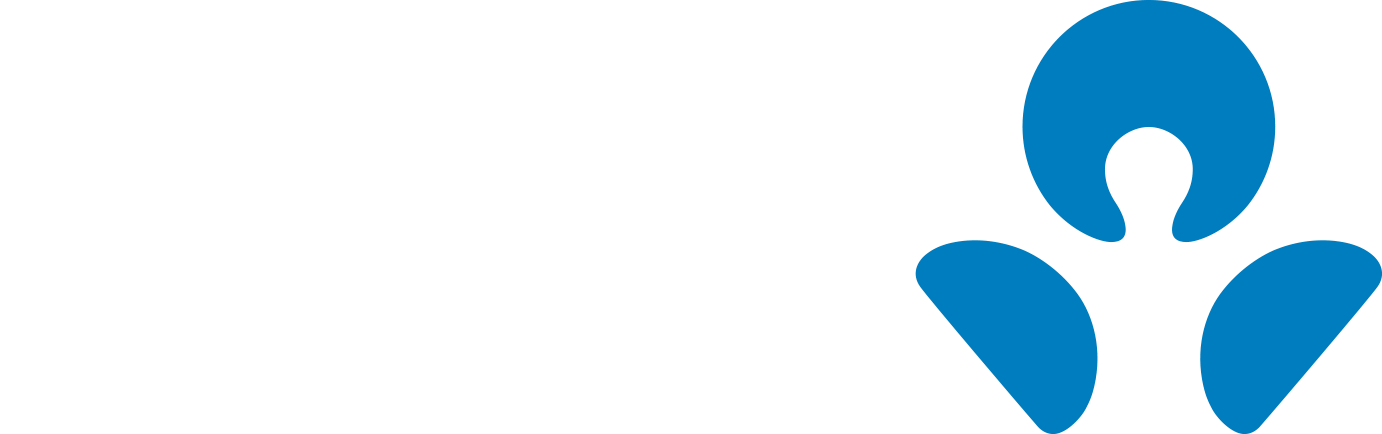

#Task 1

#Exploratory Data Analysis
Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

---



#Importing the Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 

In [239]:
import warnings
warnings.filterwarnings('ignore')

In [176]:
df=pd.read_excel('/content/ANZ synthesised transaction dataset.xlsx')

In [177]:
df.head(20)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [178]:
df.shape

(12043, 23)

In [179]:
# checking the datatypes of each column
df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [180]:
#checking columns in the dataframe
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [181]:
#Null values in the dataframe
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percentage = round(missing / len(df), 3) * 100
pd.DataFrame({"Number of missing values": missing, "Percentage": missing_percentage}).sort_values(by = "Percentage", ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


In [182]:
#Currency Check
df['currency'].value_counts()

AUD    12043
Name: currency, dtype: int64

In [183]:
# the array of account numbers
df['account'].unique()

array(['ACC-1598451071', 'ACC-1222300524', 'ACC-1037050564',
       'ACC-1608363396', 'ACC-2776252858', 'ACC-182446574',
       'ACC-602667573', 'ACC-2171593283', 'ACC-588564840',
       'ACC-1496451953', 'ACC-1903037542', 'ACC-2014856841',
       'ACC-4163822186', 'ACC-3954677887', 'ACC-4258502723',
       'ACC-2890243754', 'ACC-3481401842', 'ACC-2615038700',
       'ACC-966140392', 'ACC-354106658', 'ACC-1443681913',
       'ACC-1710017148', 'ACC-2673069055', 'ACC-3485804958',
       'ACC-3100725361', 'ACC-1990648130', 'ACC-154431271',
       'ACC-3689607373', 'ACC-721712940', 'ACC-1799207998',
       'ACC-2107684084', 'ACC-2173390920', 'ACC-1243371644',
       'ACC-1683215619', 'ACC-2901672282', 'ACC-1652235822',
       'ACC-414431115', 'ACC-1334819143', 'ACC-3541460373',
       'ACC-1650504218', 'ACC-3326339947', 'ACC-3879258709',
       'ACC-2249586092', 'ACC-3827517394', 'ACC-958000567',
       'ACC-2305712452', 'ACC-38923874', 'ACC-819621312',
       'ACC-1973887809', 'ACC-151613

In [184]:
#Gender counts
df['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [185]:
#Top 20 merchant suburb
df['merchant_suburb'].value_counts().head(20)

Melbourne        255
Sydney           233
Southport         82
Brisbane City     79
Chatswood         55
Perth             45
Adelaide          44
Mount Gambier     41
Broadbeach        41
Parramatta        39
North Sydney      37
Broken Hill       36
Richmond          35
Darwin City       35
Ringwood          35
Castlemaine       33
Ceduna            33
Nowra             33
Robina            33
Brookvale         32
Name: merchant_suburb, dtype: int64

In [186]:
df['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

#Data Exploration 

---



In [187]:
# 1)finding out the average male and female salary.
# 2)finding out the max male and female salary.

male_salary = df[df['gender']=='M']

male_avg_salary = male_salary['amount'].values.mean()

#Female:-
female_salary = df[df['gender']=='F']

female_avg_salary = female_salary['amount'].values.mean()

print("Average Male Salary ::-",male_avg_salary)
print("Average Female Salary ::-",female_avg_salary)

Average Male Salary ::- 205.72180906921238
Average Female Salary ::- 168.51730288294544


In [188]:
# finding out the max salary:-

max_male_salary = male_salary['amount'].values.max()
max_female_salary = female_salary['amount'].values.max()

print("Max salary of male",max_male_salary)
print("Max salary of female",max_female_salary)

Max salary of male 8835.98
Max salary of female 7081.09


#Data Visualization

---



#Data transaction volumne over dates

In [189]:
date_group = df.groupby('date')["amount"].sum().reset_index()
date_group

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58
3,2018-08-04,6296.05
4,2018-08-05,4426.50
...,...,...
86,2018-10-27,6971.58
87,2018-10-28,8438.11
88,2018-10-29,38549.14
89,2018-10-30,22062.34


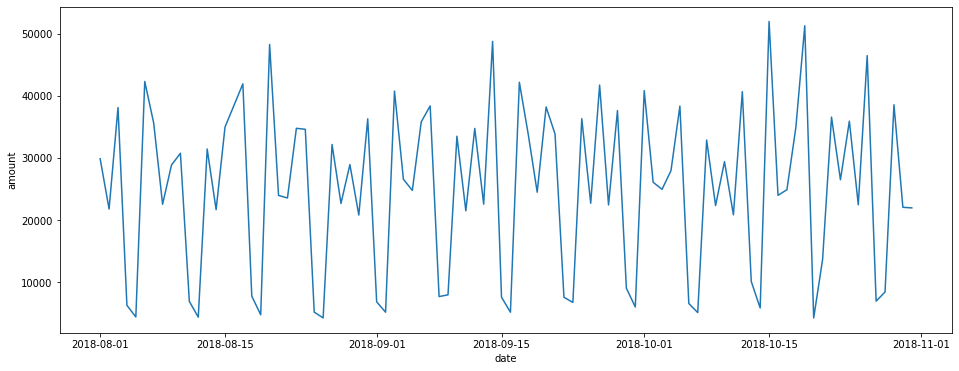

In [190]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",data=date_group,palette='set1')

#Average transaction amount per day:-

In [191]:
date_mean = df.groupby("date")["amount"].mean().reset_index()

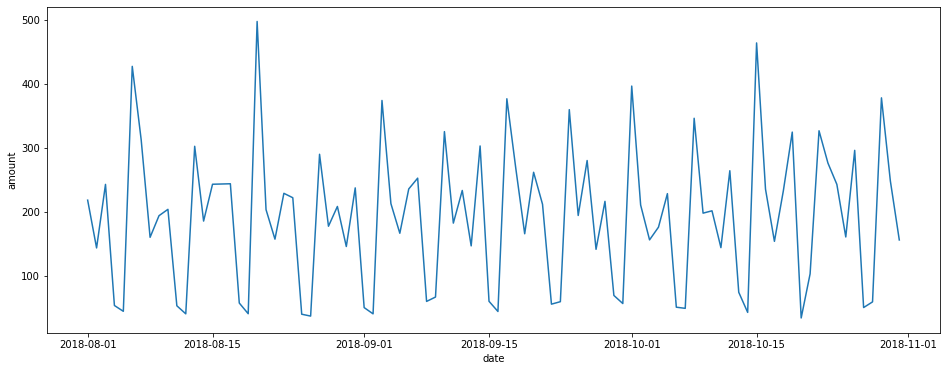

In [192]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",data=date_mean)

#Transaction volumne over *Gender*

In [193]:
trans_vol_gender =df[['date','amount','gender']]
trans_vol_gender

,date,amount,gender
0,2018-08-01,16.25,F
1,2018-08-01,14.19,F
2,2018-08-01,6.42,M
3,2018-08-01,40.90,F
4,2018-08-01,3.25,F
...,...,...,...
12038,2018-10-31,9.79,F
12039,2018-10-31,63.87,M
12040,2018-10-31,43.96,M
12041,2018-10-31,30.77,M


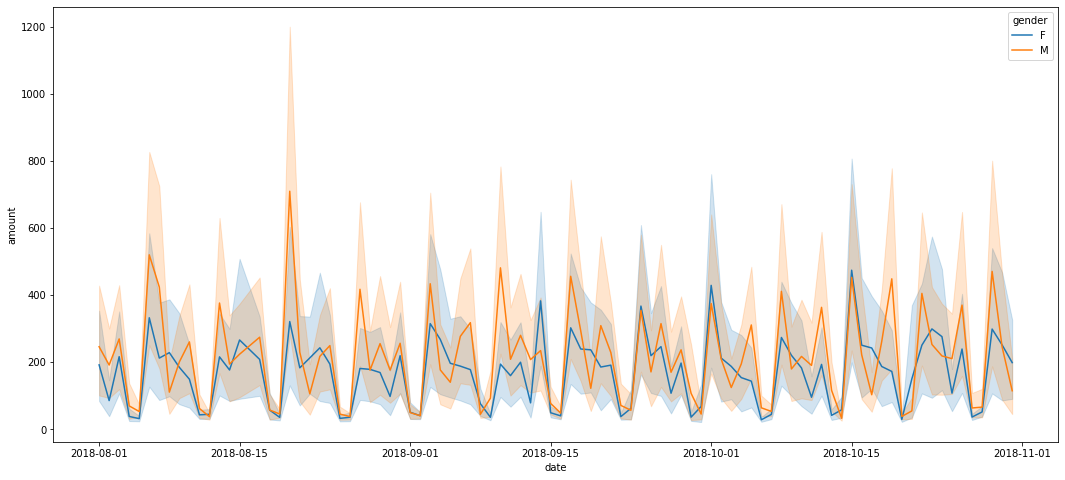

In [194]:
#Lineplot
plt.figure(figsize=(18,8))

sns.lineplot(y='amount',
            x='date',
            hue='gender',
            data=trans_vol_gender)

#Mean transaction :--*hue ='gender'*

In [195]:
gender_mean = df.groupby(["date","gender"])["amount"].mean().reset_index()
gender_mean.head()

,date,gender,amount
0,2018-08-01,F,191.952676
1,2018-08-01,M,246.050000
2,2018-08-02,F,85.452899
3,2018-08-02,M,191.446627
4,2018-08-03,F,216.349241


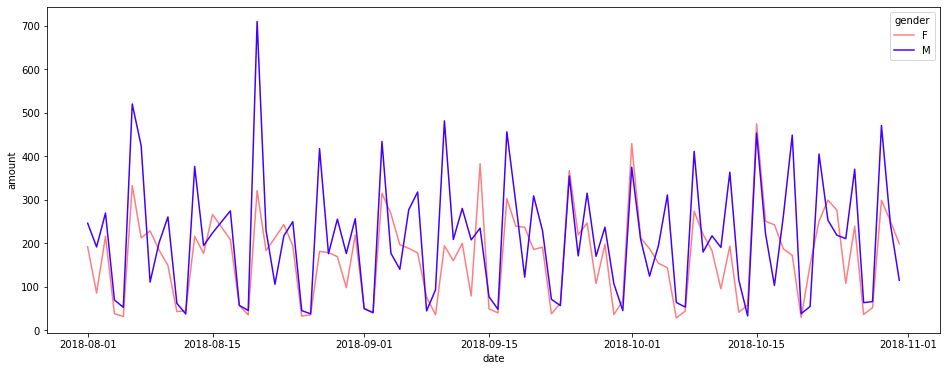

In [196]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender", data=gender_mean,palette='gnuplot2_r')

#Merchant State transaction volume.

In [197]:
merchant_state = df.groupby(["date","merchant_state"])["amount"].sum().reset_index()
merchant_state

,date,merchant_state,amount
0,2018-08-01,NSW,828.36
1,2018-08-01,NT,73.25
2,2018-08-01,QLD,921.76
3,2018-08-01,SA,62.37
4,2018-08-01,TAS,17.13
...,...,...,...
611,2018-10-31,QLD,364.08
612,2018-10-31,SA,732.82
613,2018-10-31,TAS,19.18
614,2018-10-31,VIC,700.07


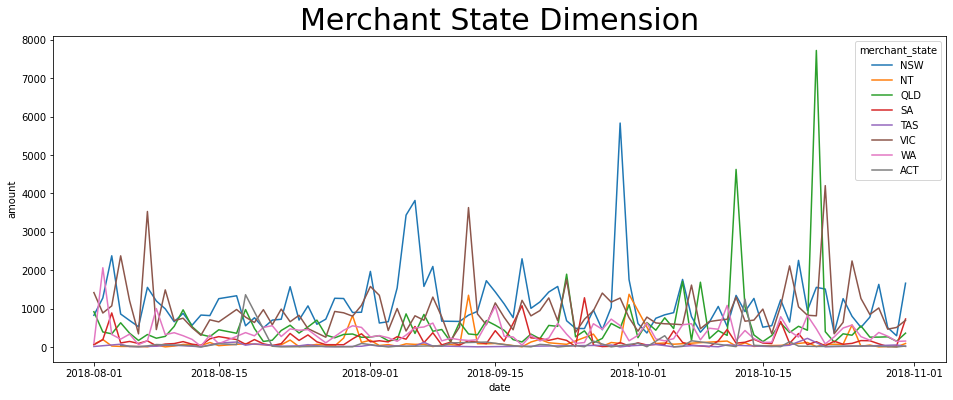

In [198]:
plt.figure(figsize=(16,6))
sns.lineplot(y='amount',x='date',hue='merchant_state',data=merchant_state)
plt.title("Merchant State Dimension",fontsize=30)
plt.show()

#Transaction volume by merchant state (barplot)

---



In [199]:
# Visualizing Through Bar plots...

df_merchant_states_total = df.groupby(['merchant_state','gender'])['amount'].sum().reset_index()

df_merchant_states_total.head(10)

,merchant_state,gender,amount
0,ACT,F,1657.44
1,ACT,M,3219.24
2,NSW,F,41430.88
3,NSW,M,60590.89
4,NT,F,8741.42
5,NT,M,427.47
6,QLD,F,28611.05
7,QLD,M,24872.40
8,SA,F,11349.73
9,SA,M,5426.84


Text(0.5, 1.0, 'Barplot for merchant states')

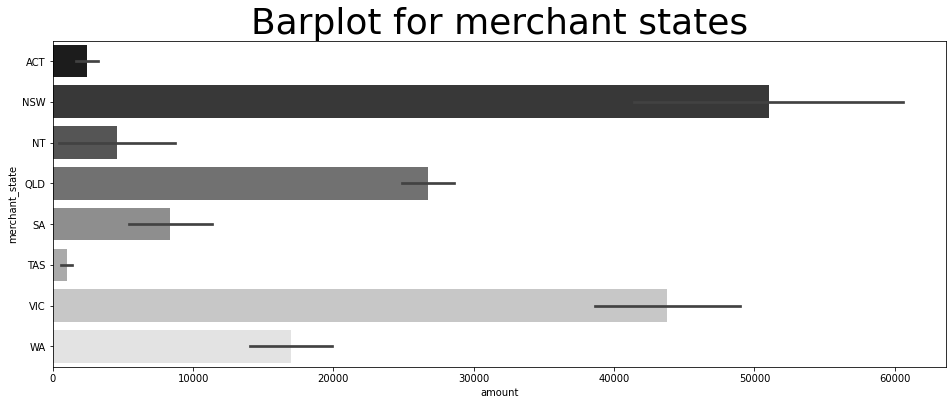

In [200]:
# Visualizing Through Bar plots...
plt.figure(figsize=(16, 6))
sns.barplot(x="amount", y="merchant_state",  data=df_merchant_states_total,palette='gist_yarg_r')
plt.title("Barplot for merchant states",fontsize=36)

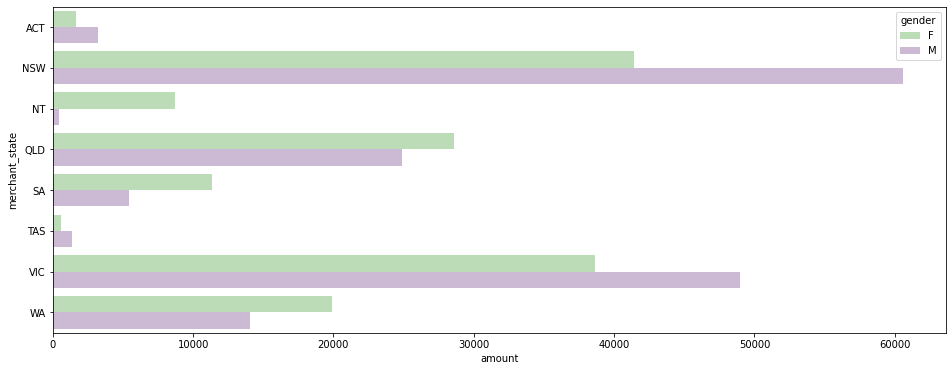

In [201]:
plt.figure(figsize=(16, 6))
sns.barplot(x="amount", y="merchant_state", hue="gender", data=df_merchant_states_total,palette='PRGn_r')

In [202]:
merchant_state_mean = df.groupby(["date","merchant_state"])["amount"].mean().reset_index()
merchant_state_mean.head()

,date,merchant_state,amount
0,2018-08-01,NSW,29.584286
1,2018-08-01,NT,24.416667
2,2018-08-01,QLD,54.221176
3,2018-08-01,SA,15.592500
4,2018-08-01,TAS,17.130000


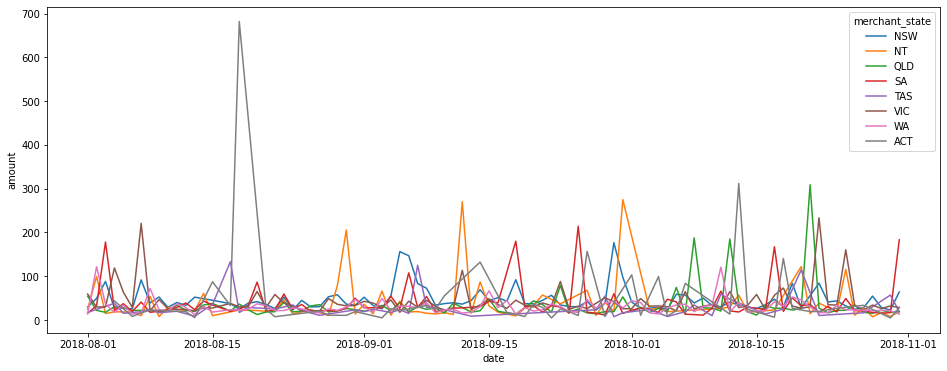

In [203]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=merchant_state_mean)

#Transaction volume by merchant suburb

In [204]:
merchant_suburb = df.groupby(["merchant_suburb"])["amount"].mean().reset_index()
merchant_suburb.head()

,merchant_suburb,amount
0,Abbotsford,400.858
1,Aberdeen,26.225
2,Aberfeldie,57.770
3,Aberfoyle Park,42.460
4,Acacia Ridge,10.300


In [205]:
sorted_suburb = merchant_suburb.sort_values(by='amount',ascending=False)
print(sorted_suburb.head(10))

     merchant_suburb      amount
1126        Pantapin  829.765000
555      Gladesville  734.100000
1528    West Wodonga  559.330000
1322  South Brisbane  559.075238
1130           Parap  553.918333
827         Lowlands  524.580000
969    Mossman Gorge  501.670000
504        Fairlight  496.760000
399           Deakin  491.506667
980    Mount Gravatt  453.523333


#Account balance over dates.

In [206]:
account_balance = df.groupby(["date",'gender'])["balance"].sum().reset_index()
account_balance.head()

,date,gender,balance
0,2018-08-01,F,619748.69
1,2018-08-01,M,741205.93
2,2018-08-02,F,707846.59
3,2018-08-02,M,1414623.33
4,2018-08-03,F,296789.02


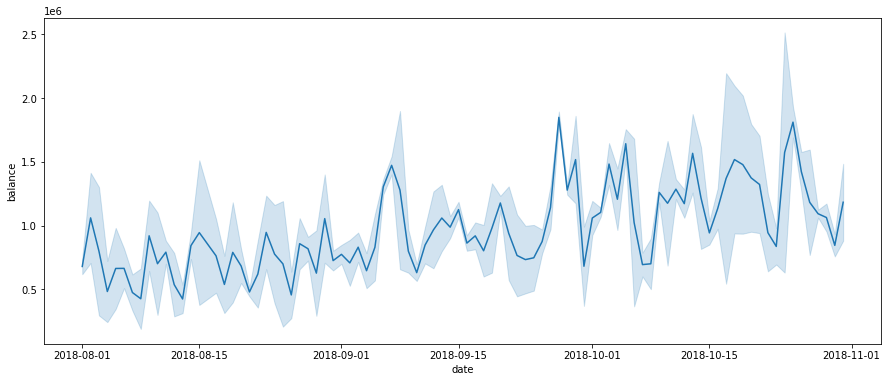

In [207]:
plt.figure(figsize=(15,6))
sns.lineplot(y='balance',x='date',data=account_balance)

#Account balance (mean) over dates

In [208]:
account_mean = df.groupby(['date','gender'])["balance"].mean().reset_index()
account_mean.head(10)

,date,gender,balance
0,2018-08-01,F,8728.854789
1,2018-08-01,M,11230.392879
2,2018-08-02,F,10258.646232
3,2018-08-02,M,17043.654578
4,2018-08-03,F,3756.823038
5,2018-08-03,M,16701.198590
6,2018-08-04,F,4006.868852
7,2018-08-04,M,12701.482632
8,2018-08-05,F,8672.162750
9,2018-08-05,M,16381.100500


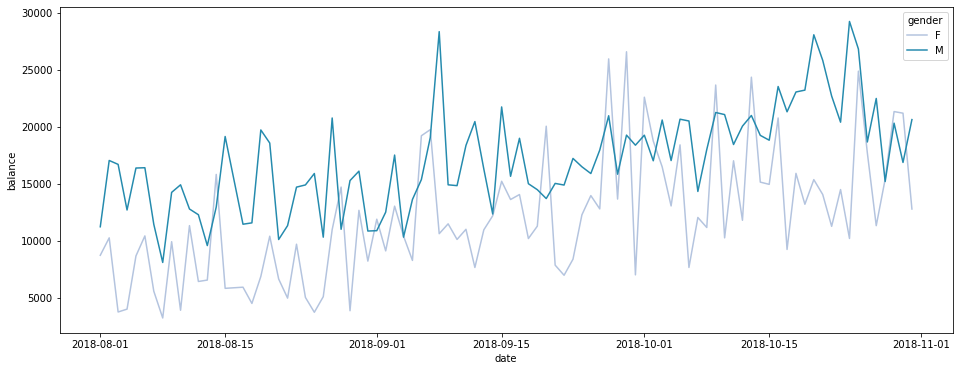

In [209]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",hue='gender',data=account_mean,palette='PuBuGn')

#Account balance (mean) for various states over dates

---



In [210]:
#Over the state
acc_bal_state_mean= df.groupby(["date",'merchant_state'])["balance"].mean().reset_index()
acc_bal_state_mean.head(5)

,date,merchant_state,balance
0,2018-08-01,NSW,3570.146429
1,2018-08-01,NT,366.056667
2,2018-08-01,QLD,5459.165294
3,2018-08-01,SA,5728.495000
4,2018-08-01,TAS,6924.650000


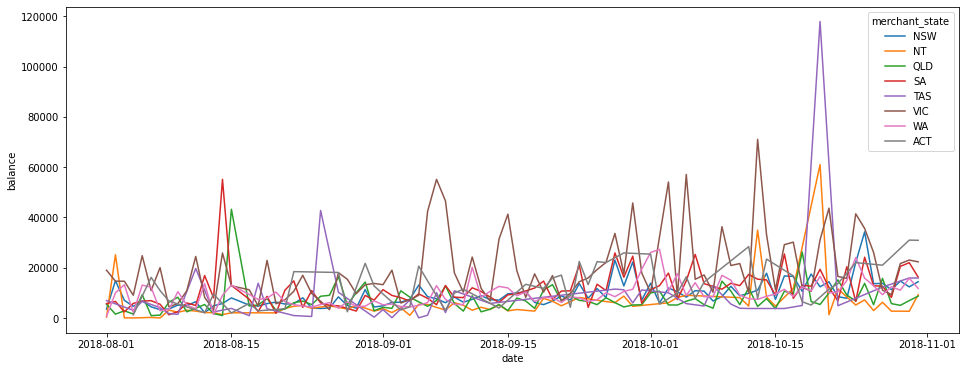

In [211]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",hue='merchant_state',data=acc_bal_state_mean)

In [212]:
acc_bal_state= df.groupby(['merchant_state',"gender"])["balance"].mean().reset_index()
acc_bal_state.head(10)

,merchant_state,gender,balance
0,ACT,F,14433.733913
1,ACT,M,9176.572593
2,NSW,F,8855.846765
3,NSW,M,9936.826013
4,NT,F,4730.673850
5,NT,M,38011.864000
6,QLD,F,2994.443750
7,QLD,M,11428.045648
8,SA,F,11307.189714
9,SA,M,10924.267706


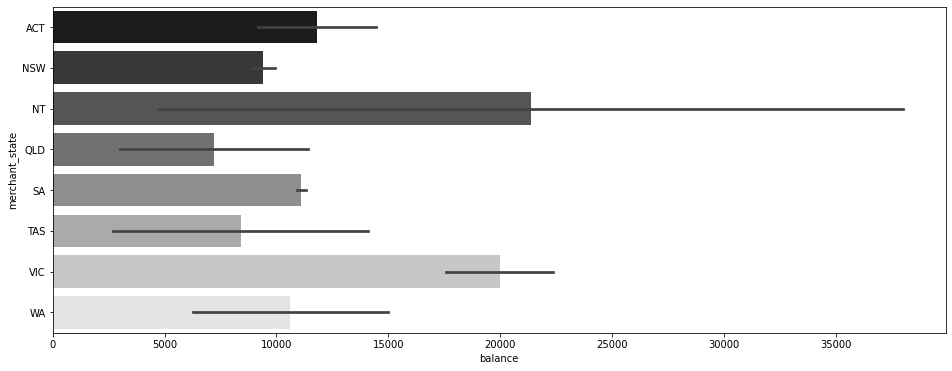

In [213]:
plt.figure(figsize=(16, 6))
sns.barplot(x="balance", y="merchant_state",  data=acc_bal_state,palette='gist_yarg_r')

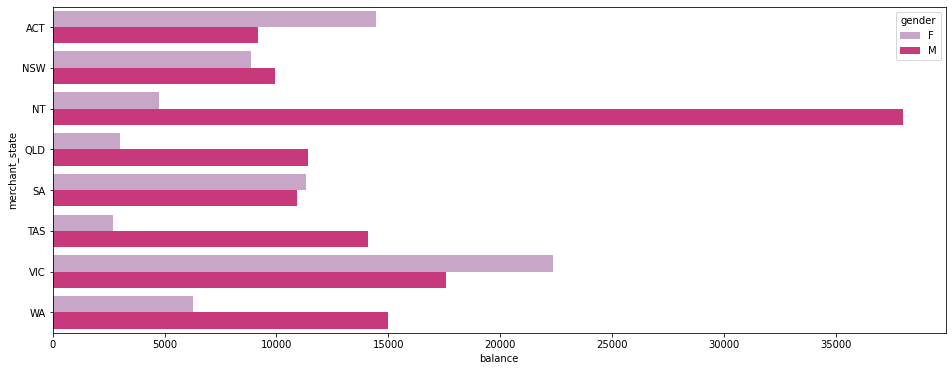

In [214]:
plt.figure(figsize=(16, 6))
sns.barplot(x="balance", y="merchant_state",hue="gender",  data=acc_bal_state,palette='PuRd')

#Transaction by different Age groups

In [215]:
age_transaction = df.groupby(['age','gender'])['amount'].sum().reset_index()
age_transaction.head(10)

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79
5,20,M,67341.64
6,21,F,63523.91
7,21,M,83735.03
8,22,M,103843.01
9,23,F,26408.22


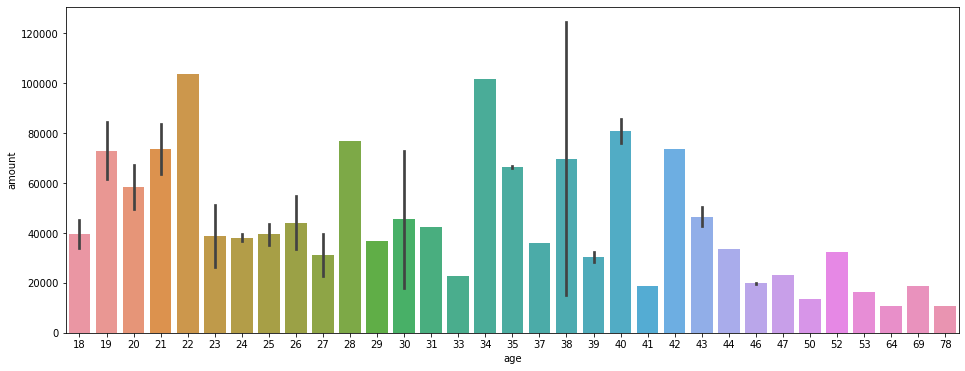

In [216]:
plt.figure(figsize=(16,6))
sns.barplot(y='amount',x='age',data=age_transaction)

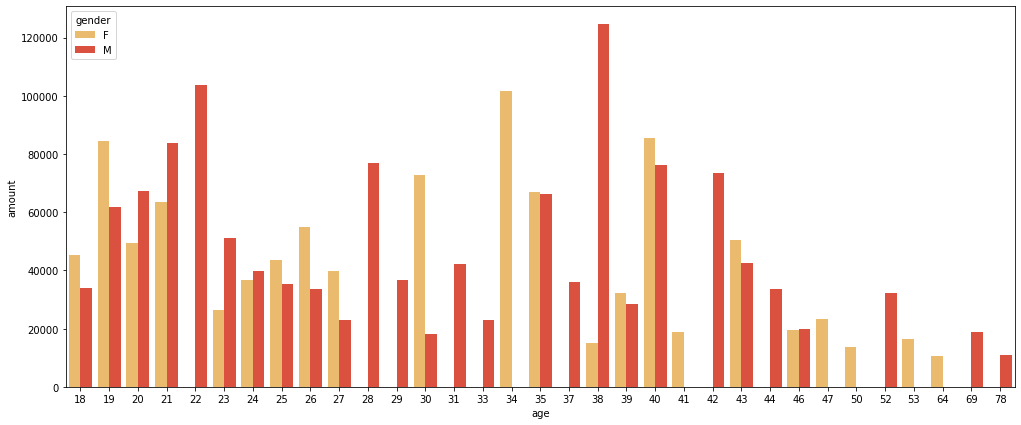

In [217]:
plt.figure(figsize=(17,7))
sns.barplot(y='amount',x='age',hue='gender',data=age_transaction,palette='YlOrRd')

#Map Plotting

---



In [229]:
df_map = df[["amount",'merchant_long_lat',"merchant_suburb","movement","gender"]]

In [230]:
df_map=df_map.dropna()

In [231]:
df_map = df_map.reindex(columns = df.columns.tolist() + ['long','lat'])

In [233]:
df_map.dtypes

status               float64
card_present_flag    float64
bpay_biller_code     float64
account              float64
currency             float64
long_lat             float64
txn_description      float64
merchant_id          float64
merchant_code        float64
first_name           float64
balance              float64
date                 float64
gender                object
age                  float64
merchant_suburb       object
merchant_state       float64
extraction           float64
amount               float64
transaction_id       float64
country              float64
customer_id          float64
merchant_long_lat     object
movement              object
long                 float64
lat                  float64
dtype: object

In [234]:
longitude=[]
latitude=[]

for row in df_map['merchant_long_lat']:
    
    longitude.append(row.split(' ')[0])
    latitude.append(row.split(' ')[1])
    
df_map["long"]=longitude
df_map["lat"]=latitude

In [235]:
df_map[["long", "lat"]] = df_map[["long", "lat"]].apply(pd.to_numeric)

In [237]:
#The maximum ranges in longitude and latitude

ranges = ((df_map.long.min(),   df_map.long.max(),      
         df_map.lat.min(), df_map.lat.max()))
print(ranges)

(113.83, 153.61, -43.31, -12.33)


In [ ]:
!pip install geopandas

In [241]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

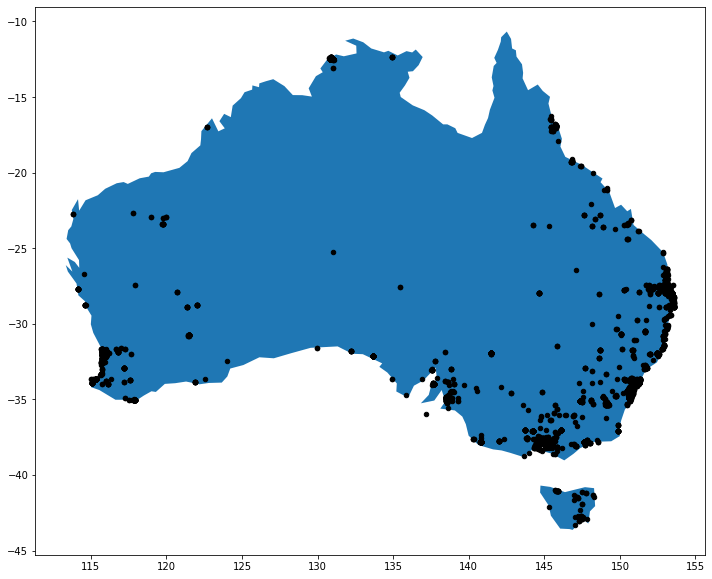

In [242]:
#Plotting the transactions over the map of australia

geometry = [Point(xy) for xy in zip(df_map['long'], df_map['lat'])]
gdf = GeoDataFrame(df_map, geometry=geometry)   

#selecting australia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

aus =  world[world.name == "Australia"]

gdf.plot(ax=aus.plot(figsize=(12, 12)), marker='o', color='black', markersize=20)

In [244]:
customer_data=df[["customer_id","first_name","age","balance",'amount']]

In [245]:
customer=customer_data.groupby(["customer_id","age","first_name"])["balance","amount"].mean().reset_index()
customer

,customer_id,age,first_name,balance,amount
0,CUS-1005756958,53,Stephanie,2275.852055,222.862603
1,CUS-1117979751,21,Lucas,9829.929000,339.843700
2,CUS-1140341822,28,Dustin,5699.212250,212.632500
3,CUS-1147642491,34,Robin,9032.841186,245.600169
4,CUS-1196156254,34,Jessica,22272.433755,147.145796
...,...,...,...,...,...
95,CUS-72755508,35,Kimberly,4497.557069,197.213276
96,CUS-809013380,21,Kaitlyn,3756.902903,151.694274
97,CUS-860700529,30,Jeffrey,3462.276009,77.681888
98,CUS-880898248,26,Robert,8528.830385,146.954487


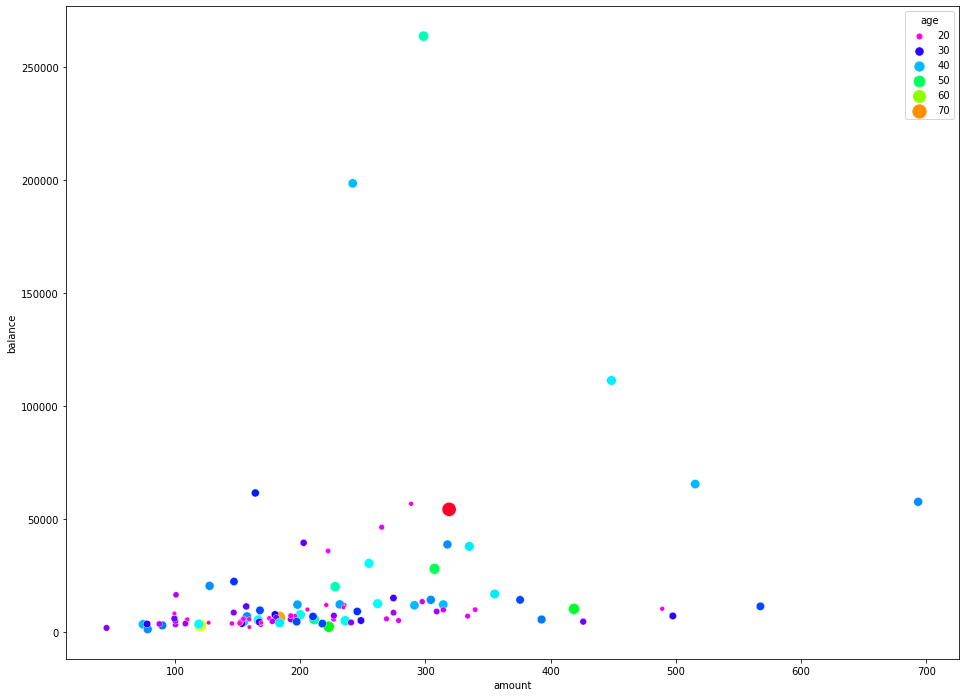

In [253]:
plt.figure(figsize=(16, 12))
sns.scatterplot(y="balance", x="amount",hue="age", palette="gist_rainbow_r", size="age",sizes=(20, 200), data=customer)

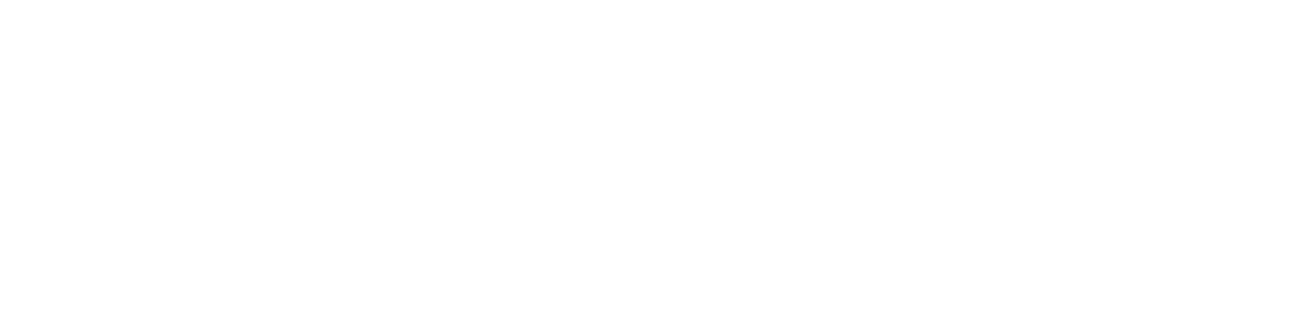